In [2]:
import gensim
import csv
import pandas as pd
import seaborn as sns
from collections import Counter

# Introduction

In this notebook we will look at the models trained on the NSF and UKRI data. These fits were done over a number of topics and are intended to be used on the whole dataset (including NIH). NIH was ommited because its relative size (i.e. number of grants) means that any model trained on that data will identify almost exclusively medical topics. 

Count how many rows in the tokenized titles and abstracts. 

In [3]:
with open("../clean-data/fine-scale/training-data/titles-abstracts-tokenized.csv") as f:
    n = sum(1 for line in f)
    
print(n)

495110


Load dictionary and corpus, these were made using a bigram model made with the NSF, NIH and UKRI data. The corpus and dictionary also excluded documents with less than 20 tokens.

In [4]:
dictionary = gensim.corpora.Dictionary.load('../clean-data/fine-scale/training-data/dictionary.dict')
corpus = gensim.corpora.MmCorpus('../clean-data/fine-scale/training-data/corpus.mm')

In [5]:
len(dictionary)

6239

In [6]:
len(corpus)

381908

## Coherence

We can evaluate the performance of the models of differing topic sizes by looking at the u-mass coherence score. This metric effectively measures the degree to which the words in the topics identified actually tend to occur together in documents across the corpus. 

In [7]:
coherence_scores = pd.read_csv('../results/fine-scale/coherence-scores/training-data/calculated_coherence.csv')

In [42]:
coherence_scores.sort_values('umass', ascending=False)

,Unnamed: 0,Topics,umass
13,13,50,-2.516706
36,36,75,-2.976225
11,11,146,-4.251177
29,29,142,-4.465684
1,1,144,-4.481466
37,37,108,-4.494314
22,22,140,-4.613671
6,6,100,-4.717815
40,40,138,-4.779871
35,35,104,-4.844444


<AxesSubplot:xlabel='Topics', ylabel='umass'>

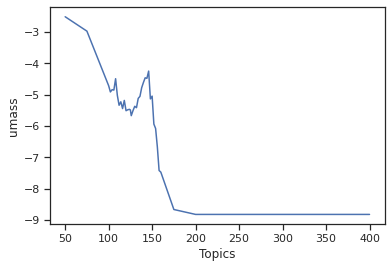

In [8]:
sns.set_theme(style="ticks")

sns.lineplot(x="Topics", y="umass", data =coherence_scores)

In [46]:
lda = gensim.models.ldamulticore.LdaMulticore.load('../results/fine-scale/lda-models/training-model/model_138_topics')

In [47]:
output_array = []
for j in range(lda.num_topics):
    topic_list = [str(i[0]) for i in lda.get_topic_terms(j)]
    topic_list.sort()
    output_array.append("".join(topic_list))

In [48]:
max(Counter(output_array).values())

1

In [37]:
topic_words = [[j[0] for j in lda.show_topic(i,topn = 10)] for i in range(lda.num_topics)]

topic_df = pd.DataFrame(topic_words)

print(topic_df.to_string())

                       0                    1                     2                    3                            4                    5                      6                   7                     8                    9
0                   data               sensor                 query               server                     database               mining             management           shipboard               service            logistics
1               manifold              problem              equation         optimization                    algorithm            algebraic              curvature            solution                matrix              solving
2               geometry               theory              equation                space                     topology              problem               operator          conjecture              symmetry                group
3                  graph             compiler         specification          programming            